In [2]:
import warnings
warnings.filterwarnings('ignore') 


In [4]:
# get data

!wget 'archive(3).zip'
!unzip 'archive(3).zip'


--2024-10-02 15:58:00--  http://archive(3).zip/
Resolving archive(3).zip (archive(3).zip)... failed: Name or service not known.
wget: unable to resolve host address ‘archive(3).zip’
Archive:  archive(3).zip
  inflating: Brain_Tumor_Dataset/Negative/Te-noTr_0000.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-noTr_0001.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-noTr_0002.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-noTr_0003.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-noTr_0004.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-noTr_0005.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-noTr_0006.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-noTr_0007.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-noTr_0008.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-noTr_0009.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0010.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0011.jpg  
  inflating: Brain_Tumor_Dataset/Negative/Te-no_0012.jpg  
  infl

In [5]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [7]:
#count no. of images in the respective classes
# 0 = Brain Tumor
# 1 = Healthy Brain

root_dir = 'Brain_Tumor_Dataset'
number_of_images = {}

for dir in os.listdir(root_dir):
  number_of_images[dir] = len(os.listdir(os.path.join(root_dir, dir)))

number_of_images.items()

dict_items([('Positive', 3266), ('Negative', 2000)])

In [8]:
os.listdir(root_dir)

['Positive', 'Negative']

In [9]:
#Split the data
#70% train data
#15% Validation
#15% Testing

In [10]:
#create train folder

if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(root_dir):
    os.makedirs(os.path.join("./train", dir))

    for img in np.random.choice(a = os.listdir(os.path.join(root_dir, dir)),
                                size = (math.floor(70/100*number_of_images[dir])-5),
                                replace = False):
      O = os.path.join(root_dir, dir, img)#path
      D = os.path.join("./train", dir)
      shutil.copy(O, D)
      os.remove(O)
else:
  print("The folder exists!")

In [11]:
def dataFolder(path,split):
  #create train folder

  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(root_dir):
      os.makedirs(os.path.join("./"+path+"/"+dir))

      for img in np.random.choice(a = os.listdir(os.path.join(root_dir, dir)),
                                  size = (math.floor(split*number_of_images[dir])-5),
                                  replace = False):
        O = os.path.join(root_dir, dir, img)#path
        D = os.path.join("./"+path, dir)
        shutil.copy(O, D)
        os.remove(O)
  else:
    print(f"{path} The folder exists!")

In [12]:
dataFolder("train",0.7)

train The folder exists!


In [15]:
dataFolder("test",0.15)

test The folder exists!


In [16]:
dataFolder("val",0.15)

val The folder exists!



MODEL BUILD






In [18]:
#import libraries
!pip install tensorflow
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential, Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

Defaulting to user installation because normal site-packages is not writeable


In [19]:

#CNN Model

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size=(3,3),activation = 'relu', input_shape = (224,224,3)))
model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()



I0000 00:00:1727865181.832184   29501 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-02 16:03:01.832621: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
  model.compile(optimizer='adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

In [21]:
def preprocessingImages1(path):
  '''
  input: path
  output: preprocessed images
  '''

  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, preprocessing_function=preprocess_input, horizontal_flip=True)  #data augmentation
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')
  return image


In [24]:
path = "train"
train_data = preprocessingImages1(path)

Found 3676 images belonging to 2 classes.


In [25]:
 def preprocessingImages2(path):
  '''
  input: path
  output: preprocessed images
  '''

  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')
  return image


In [26]:
test_data = preprocessingImages2("test")

Found 779 images belonging to 2 classes.


In [27]:
val_data = preprocessingImages2("val")

Found 779 images belonging to 2 classes.


In [28]:
train_data.class_indices

{'Negative': 0, 'Positive': 1}

In [29]:
#Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping

es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 5, verbose = 1 , mode = 'auto')

#model check point

mc = ModelCheckpoint(filepath = "./best_model.keras", monitor = 'val_accuracy', verbose = 1, save_best_only = True , mode = 'auto')

cb = [es,mc]

In [30]:
# Load MobileNet base model and fine-tune some layers
base_model = MobileNet(input_shape=(224,224,3), include_top=False)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [31]:
base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [32]:
for layer in base_model.layers:
  layer.trainable = False

In [33]:
x = Flatten()(base_model.output)
x = Dense(units = 1, activation = 'sigmoid')(x)

#creating model
model = Model(base_model.input, x)

model.summary()

#compiling model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 50,177 (196.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [34]:
# callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath = "./best_model.keras", monitor = "val_accuracy", verbose =1, save_best_only = True, mode = "auto")
es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 3, verbose = 1, mode = "auto")  
cb = [mc,es]

In [36]:
hist = model.fit(train_data,
                 steps_per_epoch=8,
                 epochs=30,
                 validation_data=val_data,
                 validation_steps=16,
                 callbacks=cb)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.9730 - loss: 0.0921
Epoch 1: val_accuracy did not improve from 0.97378
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9725 - loss: 0.0937 - val_accuracy: 0.9727 - val_loss: 0.1727
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.9597 - loss: 0.2635
Epoch 2: val_accuracy did not improve from 0.97378
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9594 - loss: 0.2771 - val_accuracy: 0.9738 - val_loss: 0.1884
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9937 - loss: 0.0581
Epoch 3: val_accuracy improved from 0.97378 to 0.98047, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9914 - loss: 0.0768 - val_accuracy: 0.9805 - val_loss: 0.1763
Epoch 3: early stopping


In [38]:
#load the best fit model
model = load_model("best_model.keras")


In [39]:
acc = model.evaluate(test_data)[1]
print(f"Our model accuracy is {acc*100} %")

25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 373ms/step - accuracy: 0.9895 - loss: 0.0477
Our model accuracy is 99.10141229629517 %


In [40]:
# Model Graphical Interpretation
h = hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

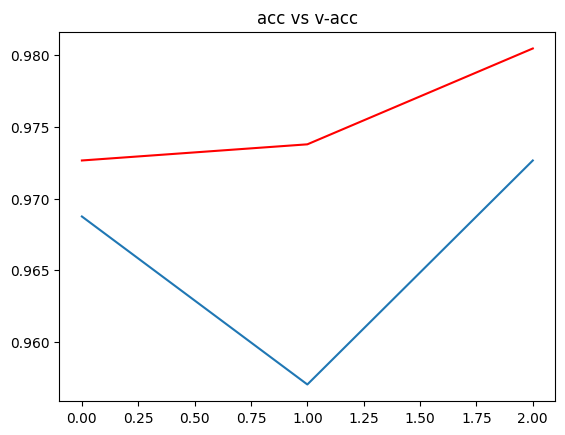

In [41]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

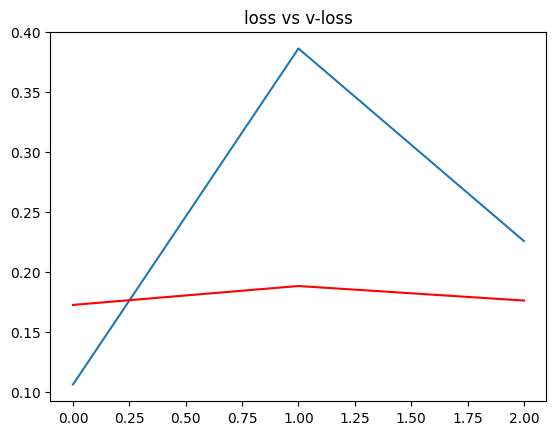

In [42]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()



In [43]:
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image
from keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
Prediction: The person has Brain Tumor


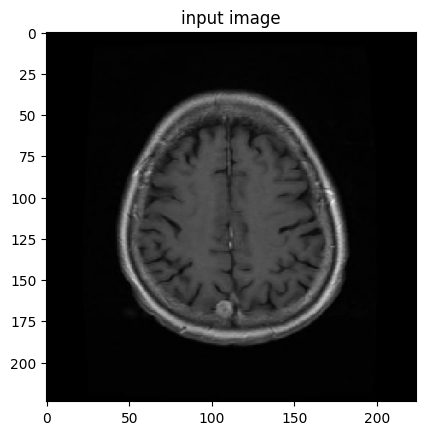

In [53]:
from keras.preprocessing import image
import numpy as np

# Load the model
model = load_model('best_model.keras')

# Load and preprocess the image
img_path = 'Brain_Tumor_Dataset/Positive/Tr-me_0807.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

#input_arr = np.array([img_array])
#input_arr.shape

# Predict
prediction = model.predict(img_array)
print('Prediction:', 'The person has Brain Tumor' if prediction[0][0] > 0.5 else 'The person is Healthy')

#Display output
plt.imshow(img)
plt.title("input image")
plt.show()
